# Practice 1. timeseries basics

데이터 셋 링크: https://www.kaggle.com/datasets/robervalt/sunspots

다음은 태양의 흑점 개수를 집계한 시계열 데이터 셋입니다. 데이터 셋이 트렌드와 계절성을 띄는지 확인해보세요. 그리고 SMA와 EWMA를 계산하고, 시각화 해보세요.

In [8]:
import pandas as pd

df = pd.read_csv("./data/Sunspots.csv", index_col="Date", parse_dates=True)
df

,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [16]:
threshold = pd.Timestamp("2000-01-01")
train_df = df[:threshold]
test_df = df[threshold:]

In [22]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(train_df["Sunspots"], seasonal=True, trace=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28020.942, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28608.894, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28317.265, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28140.992, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28606.894, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28097.504, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28095.983, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=28020.481, Time=1.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=28093.471, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=28021.302, Time=1.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=28086.494, Time=1.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28097.522, Time=1.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=28095.217, Time=0.71 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=28087.266, Time=1.52 sec
 ARIMA(3,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3012
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -14003.245
Date:                Tue, 01 Aug 2023   AIC                          28018.491
Time:                        14:59:54   BIC                          28054.551
Sample:                    01-31-1749   HQIC                         28031.459
                         - 12-31-1999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3406      0.022     60.242      0.000       1.297       1.384
ar.L2         -0.3580      0.024    -15.205      0.000      -0.404      -0.312
ar.L3         -0.0351      0.018     -1.951      0.051      -0.070       0.000
ma.L1         -1.7821      0.017   -105.071      0.000      -1.815      -1.749
ma.L2          0.8222      0.017     47.246      0.000       0.788       0.856
sigma2       641.1866     10.618     60.388      0.000     620.376     661.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1084.15
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.26
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
train_df["ARIMA"] = auto_arima_model.predict_in_sample()
test_df["ARIMA"] = auto_arima_model.predict(n_periods=len(test_df))

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_74129/1390291247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["ARIMA"] = auto_arima_model.predict_in_sample()
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_74129/1390291247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["ARIMA"] = auto_arima_model.predict(n_periods=len(test_df))


<Axes: xlabel='Date'>

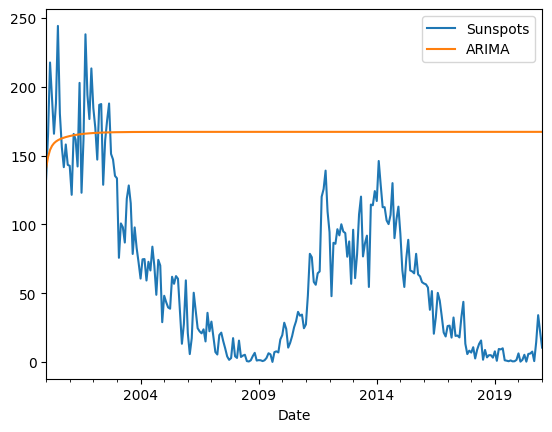

In [21]:
test_df.plot()